<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
# 1️⃣ - Importation de la bibliothèque Pandas
# Pandas est une bibliothèque Python utilisée pour la manipulation et l’analyse des données.
# Elle permet de lire, nettoyer et transformer les fichiers de données au format CSV, Excel, etc.

In [6]:
#Importation de la librairie Pandas
import pandas as pd


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [9]:
# 2️⃣ - Chargement des fichiers de données
# Nous allons importer plusieurs fichiers CSV contenant des informations spécifiques
# sur la population, la disponibilité alimentaire et la sous-nutrition.

# 📌 Chaque fichier CSV est chargé dans un DataFrame Pandas, ce qui permet une analyse efficace.

# 3️⃣ - Importation du fichier population.csv
# Ce fichier contient les données de population par pays et par année.
# Il est chargé en utilisant `pd.read_csv()` et les valeurs sont séparées par une virgule (`,`).

In [11]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv',sep=',')
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv',sep=',')
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv",sep=',')
#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv',sep=',')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [15]:
# 1️⃣ - Affichage des dimensions du dataset population
# Avant d’analyser les données, nous commençons par afficher :
# - Le nombre total d’observations (lignes)
# - Le nombre total de variables (colonnes)

In [17]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [19]:
# 2️⃣ - Affichage du type de données dans chaque colonne
# Cette étape est essentielle pour comprendre la nature des données et détecter d’éventuelles incohérences

In [21]:
# 3️⃣ - Affichage d’un résumé des informations du dataset
# Cela permet de voir combien de valeurs sont présentes (non-nulles) pour chaque colonne
# et de vérifier si certaines colonnes contiennent des valeurs manquantes

In [23]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

#La nature des données dans chacune des colonnes
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(population.info())


Le tableau comporte 3 colonne(s)
Zone       object
Année       int64
Valeur    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


In [25]:
# 4️⃣ - Affichage des 5 premières lignes du dataset avant toute modification
# Cela permet d'avoir un aperçu des valeurs initiales dans la colonne "Valeur"

In [27]:
#Affichage les 5 premières lignes de la table
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [29]:
# 5️⃣ - Harmonisation des unités
# La colonne "Valeur" représente la population en milliers d'habitants.
# Pour exprimer ces valeurs en nombre d'habitants, nous les multiplions par 1000.

In [31]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
population['Valeur'] *= 1000

In [33]:
# 6️⃣ - Renommage de la colonne "Valeur" en "Population"
# Cela permet d'améliorer la lisibilité des données

In [35]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)


In [37]:
# 7️⃣ - Affichage des 5 premières lignes après modifications
# Cela permet de vérifier que les transformations ont bien été appliquées

In [39]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [42]:
# 1️⃣ - Affichage des dimensions du dataset
# Cela permet de connaître le nombre total d'observations (lignes) et de variables (colonnes)

In [44]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [46]:
# 2️⃣ - Affichage des informations générales du dataset
# Cette étape est essentielle pour :
# - Vérifier la structure des données
# - Identifier les types de données de chaque colonne (object, float64, int64)
# - Voir le nombre de valeurs manquantes dans chaque colonne

In [48]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [50]:
# 3️⃣ - Affichage des 5 premières lignes du dataset
# Cela permet d'avoir un aperçu des premières observations pour mieux comprendre la structure des données

In [52]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [54]:
# 2️⃣ - Remplacement des valeurs manquantes (NaN) par des zéros
# Certaines colonnes contiennent des NaN (valeurs manquantes), ce qui peut poser problème lors des calculs.
# Nous remplaçons donc toutes les valeurs NaN par 0 pour éviter les erreurs.

In [56]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)


In [58]:
# 3️⃣ - Conversion des unités : 
# Certaines colonnes expriment des quantités en milliers de tonnes.
# Pour harmoniser les unités, nous les convertissons en kilogrammes (Kg).
# Nous multiplions donc ces valeurs par 1 000 000 (1 millier de tonnes = 1 000 000 Kg).


In [60]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes_to_kg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for colonne in colonnes_tonnes_to_kg:
    dispo_alimentaire[colonne] *= 1000000 


In [62]:
# 4️⃣ - Affichage des 5 premières lignes après transformation
# Cela permet de vérifier que les modifications ont bien été appliquées

In [64]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [67]:
# 1️⃣ - Affichage des dimensions du dataset
# Permet de connaître le nombre d'observations (lignes) et de colonnes (variables)

In [69]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [71]:
# 2️⃣ - Consultation des informations générales du dataset
# Vérifie la structure des données : types de colonnes, valeurs manquantes, etc.

In [73]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [75]:
# 3️⃣ - Affichage des 5 premières lignes du dataset
# Donne un aperçu du contenu des premières lignes

In [77]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [79]:
# 4️⃣ - Renommage des colonnes pour harmonisation
# "Pays bénéficiaire" est remplacé par "Zone" pour être cohérent avec les autres fichiers

In [81]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)

In [83]:
aide_alimentaire.rename(columns={"Valeur": "Aide_Alimentaire"}, inplace=True)

In [85]:
# 5️⃣ - Conversion des unités :
# La colonne "Aide_Alimentaire" représente des valeurs en tonnes.
# On les convertit en kilogrammes en multipliant par 1 000.

In [87]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Aide_Alimentaire'] *= 1000

In [89]:
# 6️⃣ - Affichage des 5 premières lignes après transformation
# Vérifie que les modifications ont bien été appliquées

In [91]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Aide_Alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [94]:
# 1️⃣ - Vérification des dimensions du dataset

In [96]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s)
Le tableau comporte 3 colonne(s)


In [98]:
# 2️⃣ - Consultation des types de données et des valeurs manquantes

In [100]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [102]:
# 3️⃣ - Affichage des 5 premières lignes avant modification

In [104]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [106]:
# 4️⃣ - Conversion de la colonne "Valeur" en numérique
# Certaines valeurs contiennent "<0.1" ou d'autres caractères non numériques.
# Nous utilisons errors='coerce' pour convertir ces valeurs en NaN

In [108]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [110]:
# 5️⃣ - Remplacement des NaN par 0 après la conversion
# Cela permet d'éviter les erreurs lors des calculs futurs

In [112]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.fillna(0, inplace=True)

In [114]:
# 6️⃣ - Renommage de la colonne "Valeur" en "Sous_nutrition" pour plus de clarté

In [116]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur": "Sous_nutrition"}, inplace=True)

In [118]:
# 7️⃣ - Conversion des unités
# Les valeurs de "Sous_nutrition" sont exprimées en millions.
# Nous les convertissons en unités standard en multipliant par 1 000 000

In [120]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] *= 1000000


In [122]:
# 8️⃣ - Affichage des 5 premières lignes après transformation

In [124]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [127]:
# 1️⃣ - Jointure des données entre la population et la sous-nutrition pour l'année 2017
# Nous fusionnons la table population avec la table sous_nutrition en prenant :
# - L'année 2017 pour la population
# - La période "2016-2018" pour la sous-nutrition (la plus proche de 2017)

In [129]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
prop_sous_nutrition = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Zone", "Sous_nutrition"]],
                               on='Zone')

In [131]:
# 2️⃣ - Affichage du dataset fusionné
# Ce tableau contient désormais :
# - Le pays (Zone)
# - La population en 2017
# - Le nombre de personnes en sous-nutrition

In [133]:
#Affichage du dataset
prop_sous_nutrition.head()

,Zone,Population,Sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [135]:
# 3️⃣ - Calcul du pourcentage de personnes en sous-nutrition
# Nous divisons le nombre total de personnes en sous-nutrition par la population totale et multiplions par 100.
# 4️⃣ - Affichage du résultat

In [137]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(prop_sous_nutrition['Sous_nutrition'].sum()*100/prop_sous_nutrition['Population'].sum()), "%")


Proportion de personnes en état de sous nutrition : 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [140]:
# 5️⃣ - Calcul du nombre théorique de personnes nourries par la disponibilité alimentaire
# Nous divisons la disponibilité alimentaire (kg/personne/an) par 365 jours pour obtenir la quantité quotidienne.

In [142]:
#Combien mange en moyenne un être humain ? Source => 
dispo_alimentaire['Nombre_personnes_nourries'] = dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] / 365


In [144]:
# 6️⃣ - Jointure des données entre la population et la disponibilité alimentaire pour 2017
# Cela permet d'ajouter la population au dataset dispo_alimentaire

In [146]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire = dispo_alimentaire.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                                            on='Zone')

In [148]:
#Affichage du nouveau dataframe
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Nombre_personnes_nourries,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,0.004712,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,0.003534,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.000164,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,0.007397,36296113.0


In [150]:
# 7️⃣ - Création d'une colonne pour calculer le total des kcal disponibles
# Nous multiplions les kcal/personne/jour par la population et par 365 jours pour obtenir l'apport total.

In [152]:
#Création de la colonne dispo_kcal et calcul des kcal disponibles mondialement
dispo_alimentaire['dispo_kcal'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire['Population'] * 365
print("dispo alimentaire totale en kcal :", dispo_alimentaire['dispo_kcal'].sum(), "kcal")

dispo alimentaire totale en kcal : 7635429388975815.0 kcal


In [154]:
# 8️⃣ - Affichage du total des kcal disponibles mondialement
# 9️⃣ - Estimation du nombre de personnes pouvant être nourries
# On suppose qu'un humain a besoin de 2500 kcal par jour.
# 1️⃣0️⃣ - Affichage du nombre théorique de personnes nourries
# 1️⃣1️⃣ - Calcul du pourcentage de la population mondiale pouvant être nourrie

In [156]:
#Calcul du nombre d'humain pouvant être nourris
total_h_kcal = round(dispo_alimentaire['dispo_kcal'].sum()/(2500*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total d'être humain pouvant être nourris : 8367593851
Proportion : 110.86 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [159]:
# 1️⃣ - Filtrer les données pour ne garder que les produits végétaux

In [161]:
#Transfert des données avec les vegetaux dans un nouveau dataframe
vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == "vegetale",:]

In [163]:
# 2️⃣ - Calcul du total de kcal disponible uniquement avec les produits végétaux
# 3️⃣ - Affichage du total de kcal disponible avec les végétaux

In [165]:
#Calcul du nombre de kcal disponible pour les végétaux
print("dispo alimentaire totale en kcal des produits végétaux :", vegetaux['dispo_kcal'].sum(), "kcal")


dispo alimentaire totale en kcal des produits végétaux : 6300178937197865.0 kcal


In [167]:
# 4️⃣ - Estimation du nombre d'humains pouvant être nourris avec les produits végétaux
# 2500 kcal/jour×365 jours = 912500 kcal/an 
# 5️⃣ - Calcul du pourcentage de la population mondiale pouvant être nourrie avec les végétaux

In [169]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
besoin_kcal_annuel = 2500 * 365 
total_h_kcal = round(vegetaux['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")


Total d'être humain pouvant être nourris : 7671450761
Proportion : 101.63 %


In [171]:
#Conclusion générale :
#7,10 % de la population mondiale était en sous-nutrition en 2017.
# La production alimentaire totale aurait pu nourrir 110,86 % de la population mondiale.
# Même uniquement avec les produits végétaux, il y avait assez de nourriture pour 101,63 % de la population mondiale.
# Ces résultats indiquent des problèmes de répartition, de gaspillage et d'accès à la nourriture plutôt qu’un véritable manque de production.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [174]:
# 1️⃣ - Calcul de la disponibilité intérieure totale
# La "Disponibilité intérieure" représente la quantité totale de nourriture disponible
# dans chaque pays après les importations et exportations.
# Nous allons donc calculer la somme totale de cette colonne pour obtenir la quantité de nourriture disponible dans le monde.
# Cela signifie qu’il y avait environ 973,4 millions de tonnes de nourriture disponible dans le monde.

In [176]:
#Calcul de la disponibilité totale
dispo_int = dispo_alimentaire['Disponibilité intérieure'].sum()
dispo_int

9733927000000.0

In [178]:
# 2️⃣- Création d'une boucle pour afficher la répartition des utilisations de la nourriture
# Nous allons maintenant analyser comment cette nourriture est utilisée.
# Elle peut être répartie en plusieurs catégories :
# - Aliments pour animaux : Quantité utilisée pour nourrir les animaux d’élevage.
# - Pertes : Quantité perdue (gaspillage, stockage inadéquat, etc.).
# - Nourriture : Quantité destinée à la consommation humaine.
# - Semences : Quantité utilisée pour replanter et produire de nouvelles cultures.
# - Traitement : Quantité transformée pour un usage industriel (biocarburants, etc.).
# - Autres Utilisations : Autres usages non spécifiés.


In [180]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    print("Proportion de", elt, ":", "{:.2f}".format(dispo_alimentaire[elt].sum()*100/dispo_int), "%")

Proportion de Aliments pour animaux : 13.23 %
Proportion de Pertes : 4.65 %
Proportion de Nourriture : 49.37 %
Proportion de Semences : 1.58 %
Proportion de Traitement : 22.45 %
Proportion de Autres Utilisations : 8.82 %


In [182]:
# 🔹 Interprétation des résultats :
# - Environ **49,37 %** de la nourriture est destinée à la consommation humaine.
# - **13,23 %** de la production est utilisée pour nourrir **les animaux d’élevage**.
# - **22,45 %** est utilisée pour **le traitement industriel** (biocarburants, produits non alimentaires).
# - **4,65 %** est **perdue**, ce qui représente un gaspillage significatif.
# - **1,58 %** est réservée aux **semences** pour replanter de nouvelles cultures.
# - **8,82 %** correspond à **d'autres usages divers**.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [185]:
#1️⃣ -La liste liste_cereales contient les noms des céréales que nous voulons analyser.
#Nous filtrons dispo_alimentaire pour ne garder que les lignes où le Produit appartient à cette liste.
#Cela permet de travailler uniquement sur les céréales sans inclure d'autres types d'aliments.

In [187]:
#Création d'une liste avec toutes les variables
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [189]:
# 2️⃣ - Filtrage des données pour ne garder que les céréales
# Nous utilisons la méthode .loc pour filtrer le dataset "dispo_alimentaire"
# et ne garder que les lignes où la colonne "Produit" correspond à un élément de notre liste de céréales.

In [191]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
# Création d'une liste de mots-clés pour identifier les céréales
cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales),:]


In [193]:
# 3️⃣ - Calcul de la proportion des céréales utilisées pour l'alimentation animale
# Nous allons maintenant calculer le pourcentage des céréales qui sont utilisées pour nourrir les animaux.
# La formule utilisée est :
# (Total des céréales utilisées pour les animaux / Disponibilité totale des céréales) * 100

In [195]:
# 4️⃣ - Affichage du résultat de l'alimentation animale
# Nous affichons le pourcentage calculé avec 2 décimales pour une meilleure lisibilité.

In [197]:
#Affichage de la proportion d'alimentation animale
print("Proportion d'alimentation animale :", "{:.2f}".format(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 36.14 %


In [199]:
# 5️⃣ - Calcul de la proportion des céréales utilisées pour l'alimentation humaine
# De la même manière, nous calculons la proportion des céréales utilisées pour la consommation humaine.
# La formule utilisée est :
# (Total des céréales consommées par les humains / Disponibilité totale des céréales) * 1

In [201]:
#Affichage de la proportion d'alimentation humain
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation humaine : 42.91 %


In [203]:
# Cela signifie que **36,14 % des céréales produites sont utilisées pour nourrir les animaux.**
# Cela signifie que **42,91 % des céréales produites sont directement consommées par les humains.**
# - Le reste (environ **21 %**) correspond à d'autres utilisations comme :
#   - Les pertes alimentaires
#   - Les semences pour de nouvelles cultures
#   - Le traitement industriel (biocarburants, alcool, amidon industriel, etc.)
#   - D'autres utilisations diverses

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [206]:
# 1️⃣ - Création d'une colonne pour calculer la proportion de sous-alimentation par pays
# La proportion est obtenue en divisant le nombre de personnes en sous-nutrition 
# par la population totale du pays en 2017.

In [208]:
#Création de la colonne proportion par pays
prop_sous_nutrition['proportion'] = prop_sous_nutrition['Sous_nutrition']/prop_sous_nutrition['Population']

In [210]:
# 2️⃣ - Tri des pays en fonction de la proportion de sous-alimentation
# Nous trions les pays par ordre décroissant selon la proportion de sous-alimentation.
# Ensuite, nous sélectionnons les 10 pays ayant les plus fortes proportions.
# 3️⃣ - Affichage des résultats pour vérifier les données

In [212]:
#affichage après trie des 10 pires pays
prop_sous_nutrition[['Zone', "proportion"]].sort_values(by="proportion", ascending=False).head(10)


,Zone,proportion
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


In [214]:
#Les 10 pays les plus touchés par la sous-alimentation en 2017 sont :

    #Haïti (48,26 % de la population en sous-nutrition)
    #République populaire démocratique de Corée (RPDC) (47,18 %)
    #Madagascar (41,06 %)
    #Libéria (38,28 %)
    #Lesotho (38,24 %)
    #Tchad (37,96 %)
    #Rwanda (35,06 %)
    #Mozambique (32,81 %)
    #Timor-Leste (32,17 %)
    #Afghanistan (28,92 %)

#Ces pays sont parmi les plus touchés par la faim et la malnutrition en raison de plusieurs facteurs :

   #Pauvreté élevée
    #Crises politiques ou conflits
    #Accès limité à la nourriture et aux infrastructures agricoles
    #Dépendance aux importations alimentaires

#Certains pays comme Haïti et Madagascar sont également touchés par des catastrophes naturelles fréquentes, réduisant la production alimentaire locale.

In [216]:
# 4️⃣ - Importation de la bibliothèque matplotlib pour la création du graphique
# 5️⃣ - Extraction des noms de pays et de leurs proportions de sous-alimentation
# Nous extrayons les données triées pour les utiliser dans le graphique.
# 6️⃣ - Création du graphique en barres horizontales
# 7️⃣ - Ajout des labels et du titre
#Proportion de personnes sous-alimentées --> Étiquette de l'axe X
#Pays --> Étiquette de l'axe Y
# 8️⃣ - Ajout d'une grille pour améliorer la lisibilité
# 9️⃣ - Affichage du graphique

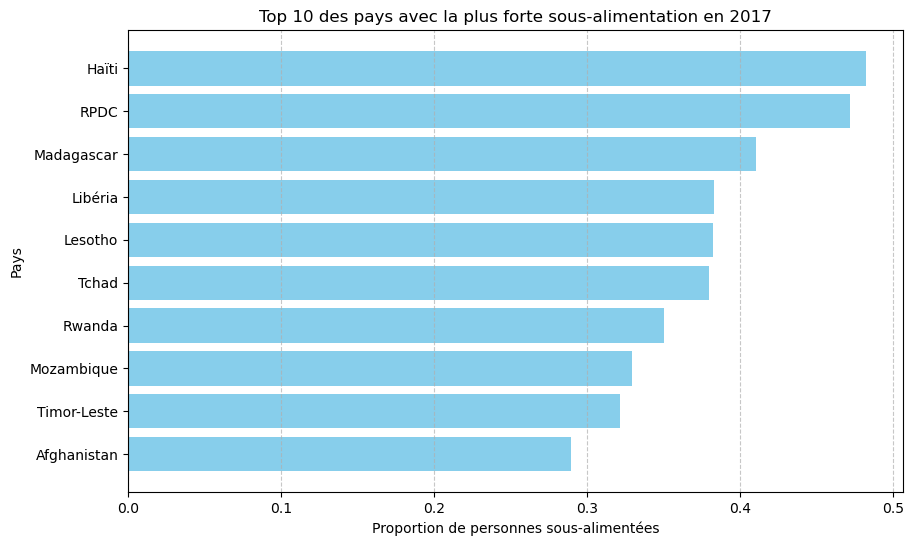

In [218]:
import matplotlib.pyplot as plt

# Données extraites de l'image
pays = ["Haïti", "RPDC", "Madagascar", "Libéria", "Lesotho", "Tchad", "Rwanda", "Mozambique", "Timor-Leste", "Afghanistan"]
proportions = [0.482592, 0.471887, 0.410629, 0.382797, 0.382494, 0.379576, 0.350556, 0.329189, 0.321735, 0.289287]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(pays[::-1], proportions[::-1], color='skyblue')
plt.xlabel("Proportion de personnes sous-alimentées")
plt.ylabel("Pays")
plt.title("Top 10 des pays avec la plus forte sous-alimentation en 2017")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


In [219]:
# Le graphique en barres classe les pays du plus touché au moins touché parmi les 10 premiers.
# Il montre que près de la moitié de la population de certains pays est en sous-alimentation.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [223]:
#calcul du total de l'aide alimentaire par pays
aide = aide_alimentaire[['Zone','Aide_Alimentaire']].groupby("Zone").sum()

In [225]:
#affichage aprés trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide.sort_values(by="Aide_Alimentaire", ascending=False).head(10)

,Aide_Alimentaire
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


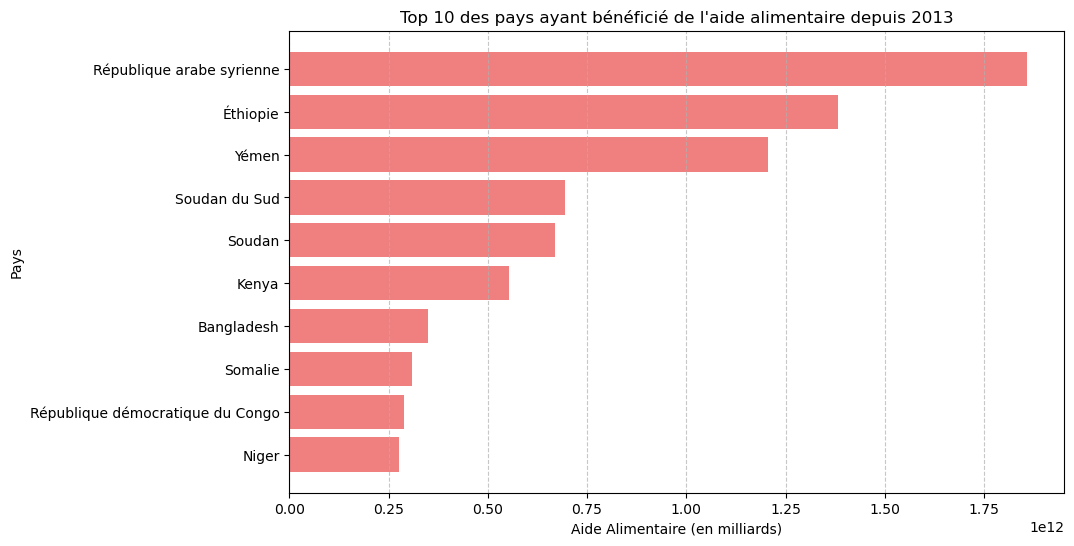

In [227]:
import matplotlib.pyplot as plt

# Données extraites de l'image
pays_aide = [
    "République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", 
    "Soudan", "Kenya", "Bangladesh", "Somalie", 
    "République démocratique du Congo", "Niger"
]
list_valeur = [
    1858943000000, 1381294000000, 1206484000000, 695284000000, 
    669784000000, 552836000000, 348188000000, 308468000000, 
    288502000000, 276344000000
]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(pays_aide[::-1],list_valeur[::-1], color='lightcoral')
plt.xlabel("Aide Alimentaire (en milliards)")
plt.ylabel("Pays")
plt.title("Top 10 des pays ayant bénéficié de l'aide alimentaire depuis 2013")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [230]:
# 1️⃣ - Calcul du total de l'aide alimentaire par pays
# Nous voulons identifier les pays ayant reçu le plus d'aide alimentaire depuis 2013.
# Nous regroupons donc les données par "Zone" (Pays) et faisons la somme de l'aide alimentaire reçue.

In [232]:
aide_alimentaire

,Zone,Année,Produit,Aide_Alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


In [234]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
cinq_pays_aide = aide_alimentaire[['Zone', 'Année', 'Aide_Alimentaire']]
cinq_pays_aide = cinq_pays_aide.groupby(["Zone", "Année"]).sum().reset_index()

In [236]:
# 2️⃣ - Tri des pays en fonction de l'aide alimentaire reçue
# Nous trions les pays par ordre décroissant en fonction de l'aide reçue.
# Ensuite, nous sélectionnons les 10 pays ayant reçu le plus d'aide alimentaire.

In [238]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

In [240]:
#On filtre sur le dataframe avec notre liste
cinq_pays_aide = cinq_pays_aide.loc[cinq_pays_aide['Zone'].isin(liste_pays),:]

In [242]:
# 3️⃣ - Affichage des résultats pour vérifier les données
# Cette liste affiche les 10 pays ayant reçu le plus d'aide alimentaire.

In [244]:
# Affichage des pays avec l'aide alimentaire par année
cinq_pays_aide

,Zone,Année,Aide_Alimentaire
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [246]:
#Les 10 pays ayant reçu le plus d'aide alimentaire depuis 2013 sont :

    #République arabe syrienne (18,58 milliards)
    #Éthiopie (13,81 milliards)
    #Yémen (12,06 milliards)
    #Soudan du Sud (6,95 milliards)
    #Soudan (6,69 milliards)
    #Kenya (5,52 milliards)
    #Bangladesh (3,48 milliards)
    #Somalie (2,92 milliards)
    #République démocratique du Congo (2,88 milliards)
    #Niger (2,76 milliards)

#Ces pays sont parmi les plus vulnérables à l'insécurité alimentaire.
#Les raisons principales de cette dépendance à l'aide alimentaire incluent :

    #Conflits et guerres civiles (Syrie, Yémen, Soudan du Sud, RDC, Somalie).
    #Crises climatiques et sécheresses (Éthiopie, Kenya, Niger).
    #Pauvreté extrême et manque d'infrastructures (Bangladesh, Soudan).

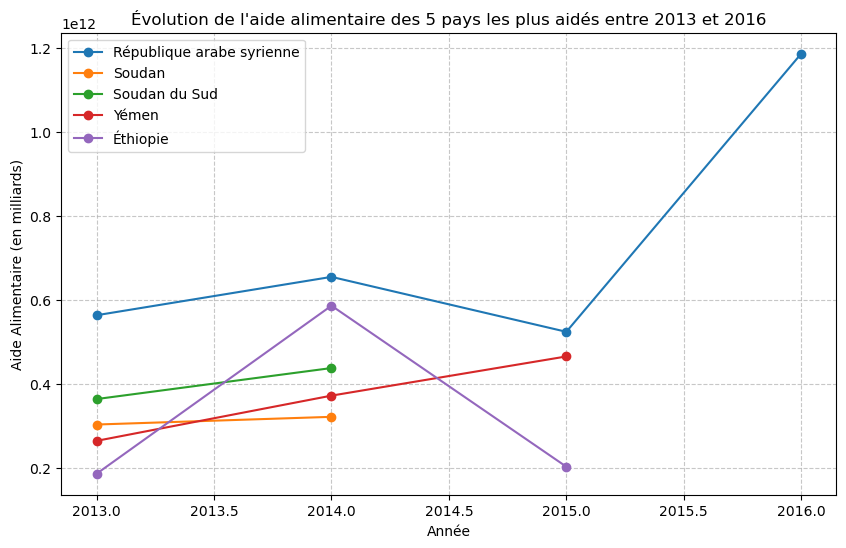

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Données extraites de l'image
data = {
    "Zone": [
        "République arabe syrienne", "République arabe syrienne", "République arabe syrienne", "République arabe syrienne",
        "Soudan", "Soudan", "Soudan du Sud", "Soudan du Sud",
        "Yémen", "Yémen", "Yémen", "Éthiopie", "Éthiopie", "Éthiopie"
    ],
    "Année": [2013, 2014, 2015, 2016, 2013, 2014, 2013, 2014, 2013, 2014, 2015, 2013, 2014, 2015],
    "Aide_Alimentaire": [
        563656000000, 654897000000, 524190000000, 1185850000000,
        303600000000, 321904000000, 364200000000, 438000000000,
        264764000000, 372360000000, 465574000000, 186542000000, 586324000000, 203266000000
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Création du graphique
plt.figure(figsize=(10, 6))
for pays in df["Zone"].unique():
    subset = df[df["Zone"] == pays]
    plt.plot(subset["Année"], subset["Aide_Alimentaire"], marker='o', label=pays)

plt.xlabel("Année")
plt.ylabel("Aide Alimentaire (en milliards)")
plt.title("Évolution de l'aide alimentaire des 5 pays les plus aidés entre 2013 et 2016")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Affichage du graphique
plt.show()


In [250]:
# Le graphique en barres classe les pays du plus aidé au moins aidé parmi les 10 premiers.
# Il montre clairement que la Syrie est le pays ayant reçu le plus d'aide alimentaire, suivi de l'Éthiopie et du Yémen.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [253]:
#Dans cette section, nous identifions les pays où la disponibilité alimentaire est la plus faible en termes de kcal/personne/jour.

# 1️⃣ - Calcul de la disponibilité alimentaire moyenne par pays
# Nous voulons connaître la disponibilité alimentaire par habitant en kcal par jour pour chaque pays.
# Nous regroupons donc les données par "Zone" (Pays) et faisons la somme des disponibilités alimentaires (kcal/personne/jour).

In [255]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_pays_total = dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()

In [257]:
# 2️⃣ - Tri des pays en fonction de la disponibilité alimentaire par habitant
# Nous trions les pays par ordre croissant pour voir ceux qui ont le moins de kcal disponibles par jour et par habitant.
# Ensuite, nous sélectionnons les 10 pays ayant la plus faible disponibilité alimentaire.
# 3️⃣ - Affichage des résultats pour vérifier les données
# Cette liste affiche les 10 pays ayant la plus faible disponibilité alimentaire.

In [259]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).head(10)

,Produit,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,
République centrafricaine,"Abats ComestibleAlcool, non ComestibleAliments...",1879.0
Zambie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0
Madagascar,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2056.0
Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0
Haïti,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2089.0
République populaire démocratique de Corée,Abats ComestibleAnimaux Aquatiques AutreAvoine...,2093.0
Tchad,"Abats ComestibleAlcool, non ComestibleAliments...",2109.0
Zimbabwe,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2113.0
Ouganda,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2126.0


In [261]:
#Les 10 pays avec la plus faible disponibilité alimentaire en 2017 :

    #République centrafricaine (1879 kcal/personne/jour)
    #Zambie (1924 kcal/personne/jour)
    #Madagascar (2056 kcal/personne/jour)
    #Afghanistan (2087 kcal/personne/jour)
    #Haïti (2089 kcal/personne/jour)
    #République populaire démocratique de Corée (RPDC) (2093 kcal/personne/jour)
    #Tchad (2109 kcal/personne/jour)
    #Zimbabwe (2113 kcal/personne/jour)
    #Ouganda (2126 kcal/personne/jour)
    #Timor-Leste (2129 kcal/personne/jour)

#Ces pays ont en moyenne moins de 2200 kcal/personne/jour, ce qui est proche ou en dessous du seuil recommandé pour un adulte (environ 2500 kcal/jour).
#Les pays ayant les plus faibles disponibilités alimentaires sont souvent touchés par :
   # Conflits et instabilité politique (République centrafricaine, Afghanistan, Haïti, RPDC, Soudan).
   # Sécheresses et faible productivité agricole (Tchad, Madagascar, Zimbabwe, Zambie).
   # Faible accès aux importations alimentaires (Timor-Leste, Haïti, RPDC).

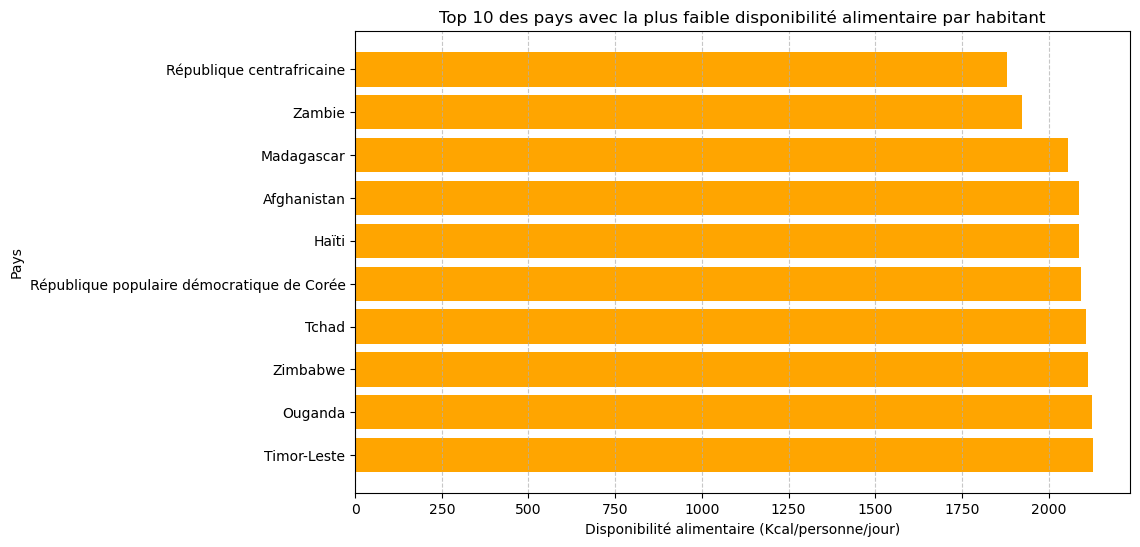

In [263]:
import matplotlib.pyplot as plt

# Données extraites de l'image
pays_dispo = [
    "République centrafricaine", "Zambie", "Madagascar", "Afghanistan", "Haïti", 
    "République populaire démocratique de Corée", "Tchad", "Zimbabwe", "Ouganda", "Timor-Leste"
]
disponibilite_kcal = [1879.0, 1924.0, 2056.0, 2087.0, 2089.0, 2093.0, 2109.0, 2113.0, 2126.0, 2129.0]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(pays_dispo[::-1], disponibilite_kcal[::-1], color='orange')
plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Pays")
plt.title("Top 10 des pays avec la plus faible disponibilité alimentaire par habitant")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


In [265]:
#Le graphique en barres classe les pays du plus bas au plus élevé en termes de disponibilité alimentaire.
#La République centrafricaine a la plus faible disponibilité avec 1879 kcal/personne/jour.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [268]:
#Dans cette section, nous identifions les pays où la disponibilité alimentaire est la plus élevée en termes de kcal/personne/jour.
# 1️⃣ - Tri des pays en fonction de la disponibilité alimentaire par habitant
# Nous trions les pays par ordre décroissant pour voir ceux qui ont le plus de kcal disponibles par jour et par habitant.
# Ensuite, nous sélectionnons les 10 pays ayant la plus forte disponibilité alimentaire.
# 2️⃣ - Affichage des résultats pour vérifier les données
# Cette liste affiche les 10 pays ayant la plus forte disponibilité alimentaire.

In [270]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)

,Produit,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,
Autriche,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3770.0
Belgique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3737.0
Turquie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3708.0
États-Unis d'Amérique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3682.0
Israël,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3610.0
Irlande,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3602.0
Italie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3578.0
Luxembourg,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3540.0
Égypte,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3518.0


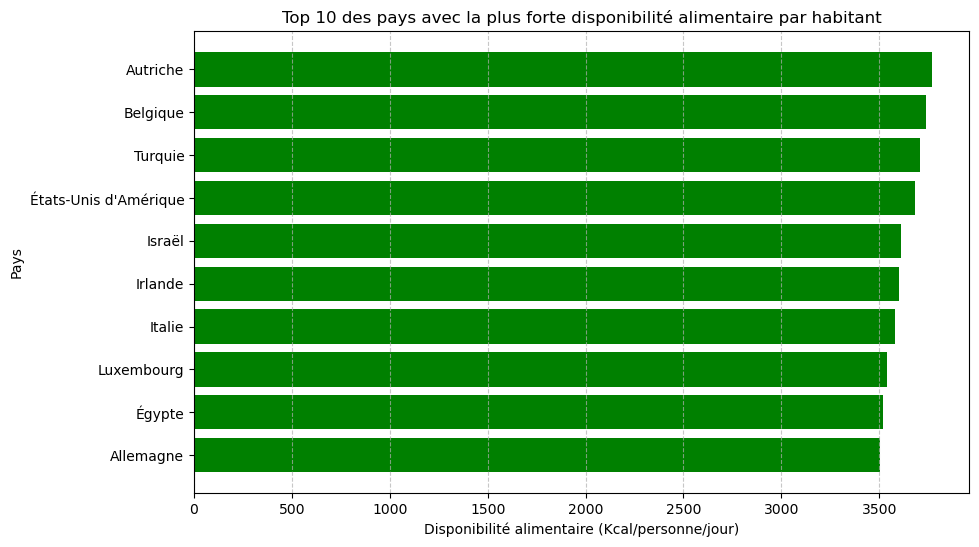

In [272]:
import matplotlib.pyplot as plt

# Données extraites de l'image
pays_dispo_plus = [
    "Autriche", "Belgique", "Turquie", "États-Unis d'Amérique", "Israël",
    "Irlande", "Italie", "Luxembourg", "Égypte", "Allemagne"
]
disponibilite_kcal_plus = [3770.0, 3737.0, 3708.0, 3682.0, 3610.0, 3602.0, 3578.0, 3540.0, 3518.0, 3503.0]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(pays_dispo_plus[::-1], disponibilite_kcal_plus[::-1], color='green')
plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Pays")
plt.title("Top 10 des pays avec la plus forte disponibilité alimentaire par habitant")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


In [274]:
#Les 10 pays avec la plus forte disponibilité alimentaire en 2017 :

    #Autriche (3770 kcal/personne/jour)
    #Belgique (3737 kcal/personne/jour)
    #Turquie (3708 kcal/personne/jour)
    #États-Unis (3682 kcal/personne/jour)
    #Israël (3610 kcal/personne/jour)
    #Irlande (3602 kcal/personne/jour)
    #Italie (3578 kcal/personne/jour)
    #Luxembourg (3540 kcal/personne/jour)
    #Égypte (3518 kcal/personne/jour)
    #Japon (3503 kcal/personne/jour)
#Ces pays ont en moyenne plus de 3500 kcal/personne/jour, ce qui est largement supérieur aux besoins quotidiens recommandés (environ 2500 kcal/jour pour un adulte moyen).
#Les pays ayant les plus fortes disponibilités alimentaires sont souvent :

    #Pays développés avec un système agricole performant (Autriche, Belgique, États-Unis, Italie).
    #Pays ayant une forte production agricole (Turquie, Égypte).
    #Pays à forte importation alimentaire (Luxembourg, Japon, Israël).

#Le graphique en barres classe les pays du moins élevé au plus élevé en termes de disponibilité alimentaire.
#L'Autriche est le pays ayant la plus forte disponibilité alimentaire avec 3770 kcal/personne/jour.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [277]:
#Dans cette section, vous analysez l'exportation et la consommation locale du manioc en Thaïlande, ainsi que le taux de sous-nutrition dans le pays.
# 1️⃣ - Création d'un DataFrame contenant uniquement les données de la Thaïlande
# Nous filtrons le dataset "prop_sous_nutrition" pour ne garder que les données de la Thaïlande.

In [279]:
#création d'un dataframe avec uniquement la Thaïlande 
thai = prop_sous_nutrition.loc[prop_sous_nutrition['Zone'] == 'Thaïlande',:]

In [281]:
# 2️⃣ - Calcul de la proportion de la population en sous-nutrition
# Nous utilisons la formule suivante :
# (Nombre de personnes en sous-nutrition / Population totale) * 100
# 3️⃣ - Affichage du taux de sous-nutrition

In [283]:
#Calcul de la sous nutrition en thailande
print('Proportion en sous nutrition en Thaïlande :', "{:.2f}".format(thai['Sous_nutrition'].iloc[0]*100/thai['Population'].iloc[0]), "%")

Proportion en sous nutrition en Thaïlande : 8.96 %


In [285]:
# 5️⃣ - Calcul de la proportion de Manioc exportée
# Nous utilisons la formule suivante :
# (Quantité exportée / Production totale) * 100

In [287]:
# On calcule la proportion exportée en fonction de la proportion
thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Zone'] == "Thaïlande"),:]
print('Proportion de manioc exportée :', "{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0]*100 / 
                                                                     thai_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


In [289]:
#Taux de sous-nutrition en Thaïlande :
    #8,96 % de la population est en sous-nutrition.
    #Cela signifie qu'environ 9 personnes sur 100 n'ont pas assez de nourriture pour couvrir leurs besoins énergétiques quotidiens.
    #Malgré une forte production agricole, une partie de la population reste vulnérable à l'insécurité alimentaire.

#Répartition du Manioc en Thaïlande :

 #83,41 % du Manioc produit est exporté.
 #Seulement 16,59 % est consommé localement.
 #Cela montre que la Thaïlande est un grand exportateur de Manioc, ce qui peut poser des questions sur l’accès à cette ressource pour la population locale.


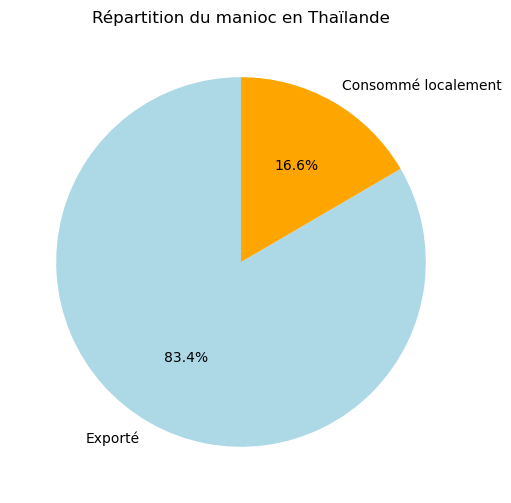

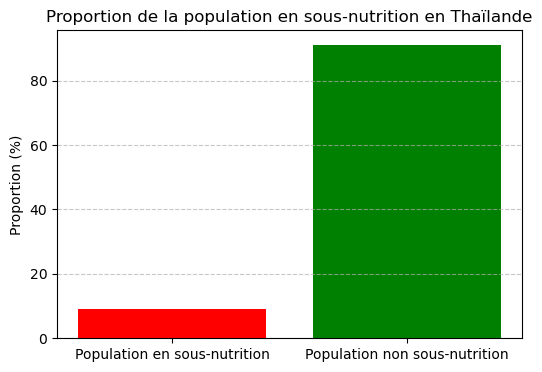

In [291]:
import matplotlib.pyplot as plt

# Données extraites de l'image
sous_nutrition_thailande = 8.96  # Pourcentage de la population en sous-nutrition
manioc_exporte = 83.41  # Pourcentage du manioc exporté
manioc_consommer_localement = 100 - manioc_exporte  # Manioc utilisé en interne

# Création du graphique pour la proportion de manioc exporté vs consommé localement
plt.figure(figsize=(6, 6))
plt.pie([manioc_exporte, manioc_consommer_localement], labels=["Exporté", "Consommé localement"], 
        autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Répartition du manioc en Thaïlande")
plt.show()

# Création du graphique pour la sous-nutrition en Thaïlande
plt.figure(figsize=(6, 4))
plt.bar(["Population en sous-nutrition", "Population non sous-nutrition"],
        [sous_nutrition_thailande, 100 - sous_nutrition_thailande], color=['red', 'green'])
plt.ylabel("Proportion (%)")
plt.title("Proportion de la population en sous-nutrition en Thaïlande")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [293]:
#Analyse et interprétation des résultats

    #Contradiction possible : Bien que la Thaïlande produise une quantité importante de Manioc, la majorité est exportée.
    #Impact sur l'insécurité alimentaire :
        #Si une plus grande partie de la production était conservée pour la consommation interne, cela pourrait réduire la sous-nutrition.
        #Cependant, l'exportation est une source de revenus pour le pays, qui peut importer d’autres denrées alimentaires.
    #Dépendance aux importations alimentaires :
        #Il serait intéressant de voir si la Thaïlande importe des aliments pour compenser ce qu’elle exporte.
        #Une analyse des autres produits alimentaires importés et consommés en Thaïlande permettrait de mieux comprendre cet équilibre.

In [295]:
#Analyse de la production animale et végétale
#Filtrer les produits selon leur origine (animale ou végétale)
#Calcul de la disponibilité alimentaire totale en kcal pour chaque type (animale & végétale)
#Calcul des proportions en %
#Création d'un graphique circulaire (camembert) pour illustrer les proportions

In [297]:
# Filtrer les produits d'origine animale et végétale
produits_animaux = dispo_alimentaire[dispo_alimentaire['Origine'] == 'animale']
produits_vegetaux = dispo_alimentaire[dispo_alimentaire['Origine'] == 'vegetale']

# Calculer la disponibilité alimentaire totale en kcal pour chaque type
kcal_animale = (produits_animaux['Disponibilité alimentaire (Kcal/personne/jour)']*produits_animaux['Population']).sum()
kcal_vegetale =( produits_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']*produits_vegetaux['Population']).sum()

# Calcul de la proportion
total_kcal = kcal_animale + kcal_vegetale
proportion_animale = (kcal_animale / total_kcal) * 100
proportion_vegetale = (kcal_vegetale / total_kcal) * 100

# Préparer les résultats dans un DataFrame pour affichage
resultats = pd.DataFrame({
    'Type': ['Produits Animaux', 'Produits Végétaux'],
    'Disponibilité alimentaire (Kcal/personne/jour)': [kcal_animale, kcal_vegetale],
    'Proportion (%)': [proportion_animale, proportion_vegetale]
})

# Affichage des résultats
print(resultats)

                Type  Disponibilité alimentaire (Kcal/personne/jour)  \
0   Produits Animaux                                    3.658220e+12   
1  Produits Végétaux                                    1.726076e+13   

   Proportion (%)  
0       17.487562  
1       82.512438  


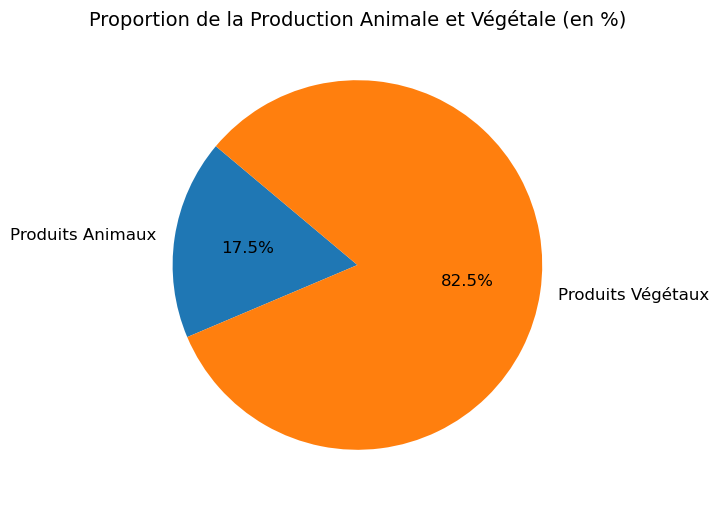

In [299]:
# Affichage du graphique
labels = ['Produits Animaux', 'Produits Végétaux']
sizes = [proportion_animale, proportion_vegetale]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Proportion de la Production Animale et Végétale (en %)', fontsize=14)
plt.show()


In [301]:
# Analyse par rapport à la population mondiale
# Besoin calorique moyen par personne par an


# Total des Kcal disponibles par an pour les produits végétaux
population_totale = population[population['Année'] == 2017]['Population'].sum()
population_nourries_animale = (kcal_animale/ 2500)    # Convertir en kcal total par an


# Calcul de la proportion
proportion_population = (population_nourries_animale / population_totale) * 100

# Affichage des résultats
print(f"Nombre total de personnes pouvant être nourries par les produits animale : {int(population_nourries_animale)}")
print(f"Proportion de la population mondiale nourrie : {proportion_population:.2f}%")

Nombre total de personnes pouvant être nourries par les produits animale : 1463288166
Proportion de la population mondiale nourrie : 19.39%
